In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('variasi_smote_tfidf_model(2).csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 863
Data columns (total 18 columns):
acc_mean                   864 non-null float64
acc_std                    864 non-null float64
precision_negative_mean    864 non-null float64
precision_negative_std     864 non-null float64
precision_positive_mean    864 non-null float64
precision_positive_std     864 non-null float64
recall_negative_mean       864 non-null float64
recall_negative_std        864 non-null float64
recall_positive_mean       864 non-null float64
recall_positive_std        864 non-null float64
ngram                      864 non-null int64
classifier                 864 non-null object
time                       864 non-null int64
smote                      864 non-null bool
tfidf                      864 non-null bool
column                     864 non-null object
delta_precision            864 non-null float64
delta_recall               864 non-null float64
dtypes: bool(2), float64(12), int64(2), obj

In [4]:
df.head()

,acc_mean,acc_std,precision_negative_mean,precision_negative_std,precision_positive_mean,precision_positive_std,recall_negative_mean,recall_negative_std,recall_positive_mean,recall_positive_std,ngram,classifier,time,smote,tfidf,column,delta_precision,delta_recall
0,78.751403,0.671919,82.538136,1.694323,75.806689,1.439570,72.549131,2.920767,84.786182,1.825816,1,nb,0,True,True,Tweet,6.731447,12.237051
1,79.284064,1.645902,83.758680,4.102071,76.004848,2.882250,72.565778,2.835674,86.107818,3.435207,1,nb,0,False,True,Tweet,7.753831,13.542039
2,80.280082,2.876495,82.354905,5.120691,78.502518,2.020834,76.873466,2.022230,83.723200,4.441269,1,nb,0,True,False,Tweet,3.852387,6.849735
3,79.214099,3.091215,82.271823,6.035600,76.788526,3.182703,74.235992,3.524279,84.407586,4.944696,1,nb,0,False,False,Tweet,5.483297,10.171594
4,80.081406,1.589401,82.982993,4.072402,77.750961,2.264408,75.423019,3.095730,84.797985,3.251261,2,nb,0,True,True,Tweet,5.232032,9.374966


## View mean accuracy based on model

In [25]:
def plotvar_boxplot(df, x, hue = None):
    f, axes = plt.subplots(1,4, figsize = (30,6))
    sns.boxplot(x = x, y = 'acc_mean', data = df, hue = hue,ax = axes[0])
    axes[0].tick_params(labelrotation=90)

    sns.boxplot(x = x, y = 'acc_std', data = df, hue = hue,ax = axes[1])
    axes[1].tick_params(labelrotation=90)

    sns.boxplot(x = x, y = 'delta_precision', data = df, hue = hue,ax = axes[2])
    axes[2].tick_params(labelrotation=90)

    sns.boxplot(x = x, y = 'delta_recall', data = df, hue = hue,ax = axes[3])
    axes[3].tick_params(labelrotation=90)
    
    return axes


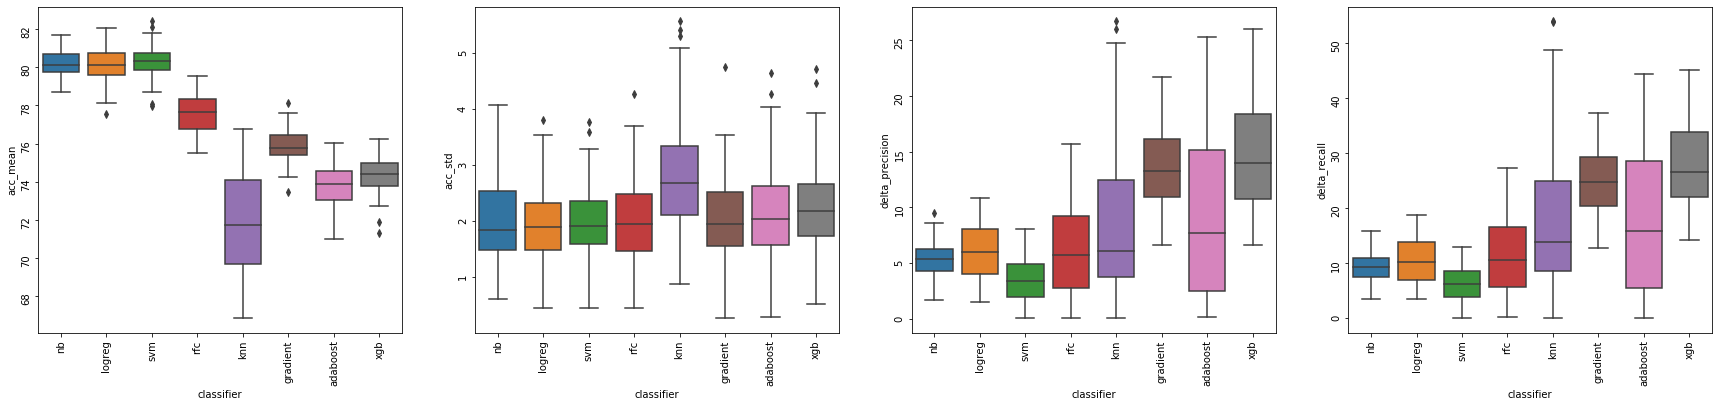

In [20]:
f, axes = plt.subplots(1,4, figsize = (30,6))
sns.boxplot(x = 'classifier', y = 'acc_mean', data = df, ax = axes[0])
axes[0].tick_params(labelrotation=90)

sns.boxplot(x = 'classifier', y = 'acc_std', data = df, ax = axes[1])
axes[1].tick_params(labelrotation=90)

sns.boxplot(x = 'classifier', y = 'delta_precision', data = df, ax = axes[2])
axes[2].tick_params(labelrotation=90)

sns.boxplot(x = 'classifier', y = 'delta_recall', data = df, ax = axes[3])
axes[3].tick_params(labelrotation=90)

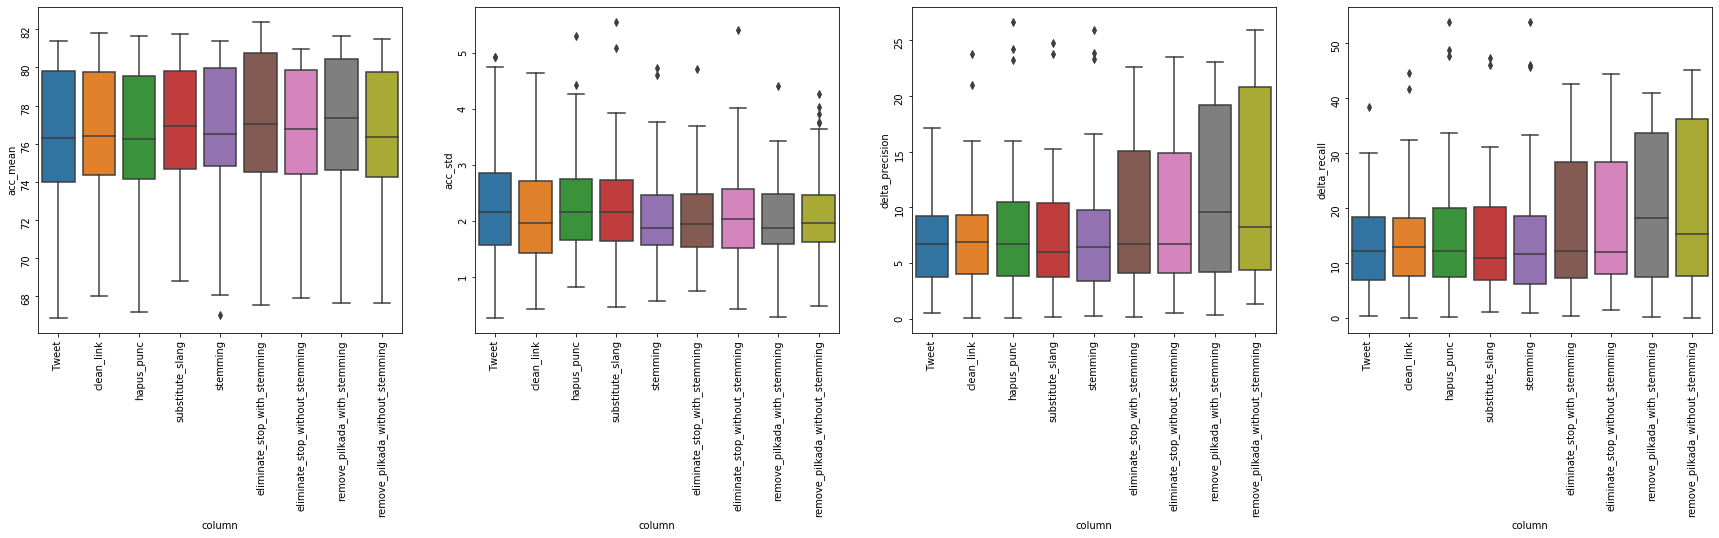

In [19]:
f, axes = plt.subplots(1,4, figsize = (30,6))
sns.boxplot(x = 'column', y = 'acc_mean', data = df, ax = axes[0])
axes[0].tick_params(labelrotation=90)

sns.boxplot(x = 'column', y = 'acc_std', data = df, ax = axes[1])
axes[1].tick_params(labelrotation=90)

sns.boxplot(x = 'column', y = 'delta_precision', data = df, ax = axes[2])
axes[2].tick_params(labelrotation=90)

sns.boxplot(x = 'column', y = 'delta_recall', data = df, ax = axes[3])
axes[3].tick_params(labelrotation=90)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2061c128>,
      dtype=object)

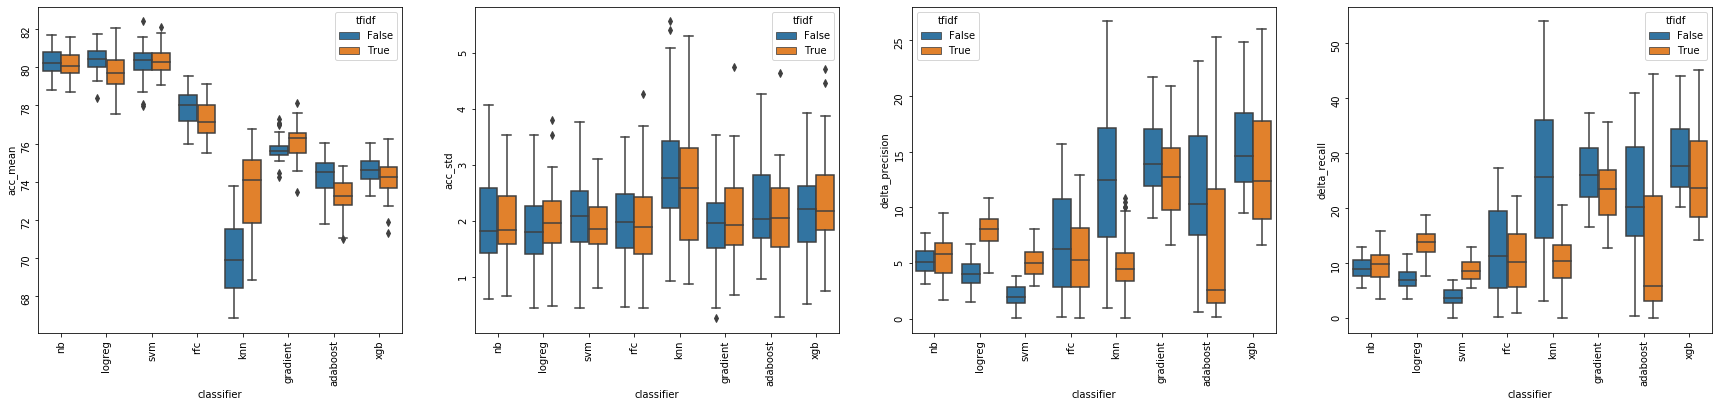

In [28]:
plotvar_boxplot(df, 'classifier', hue = 'tfidf')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2111ab00>,
      dtype=object)

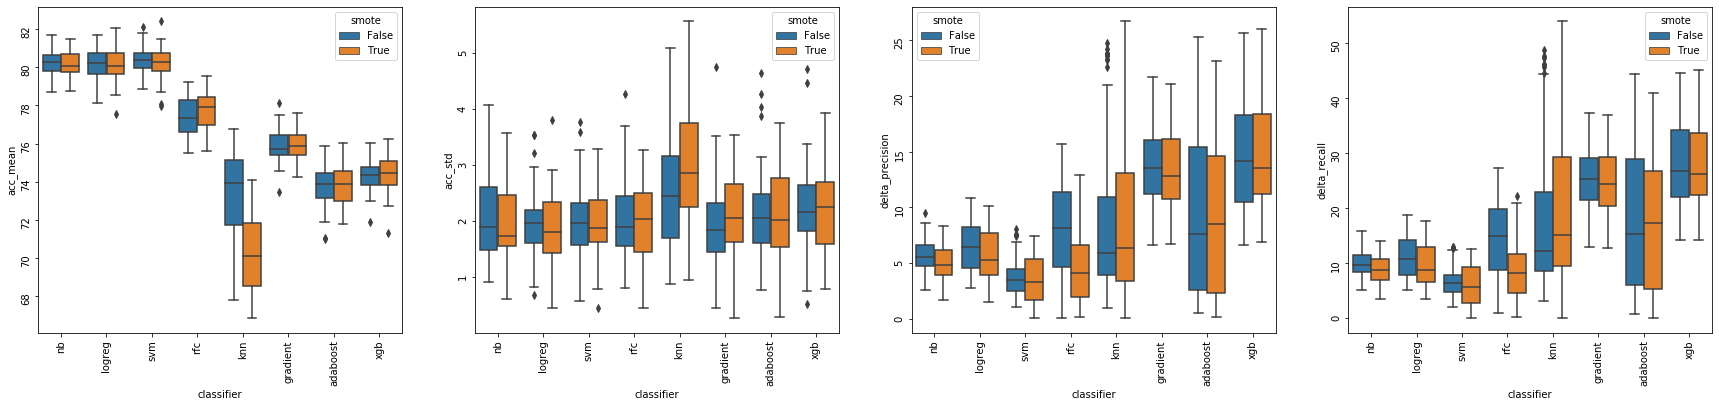

In [29]:
plotvar_boxplot(df, 'classifier', hue = 'smote')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e4e3fd0>,
      dtype=object)

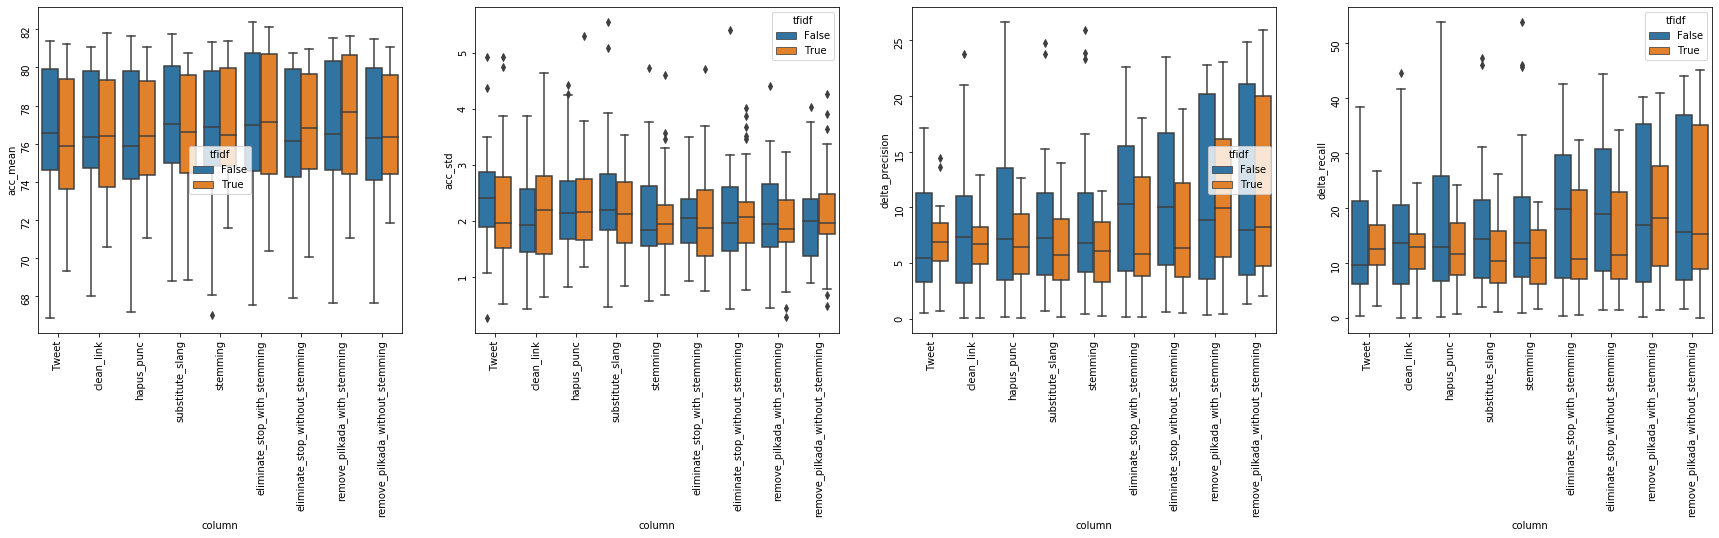

In [26]:
plotvar_boxplot(df, 'column', hue = 'tfidf')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fdbdd68>,
      dtype=object)

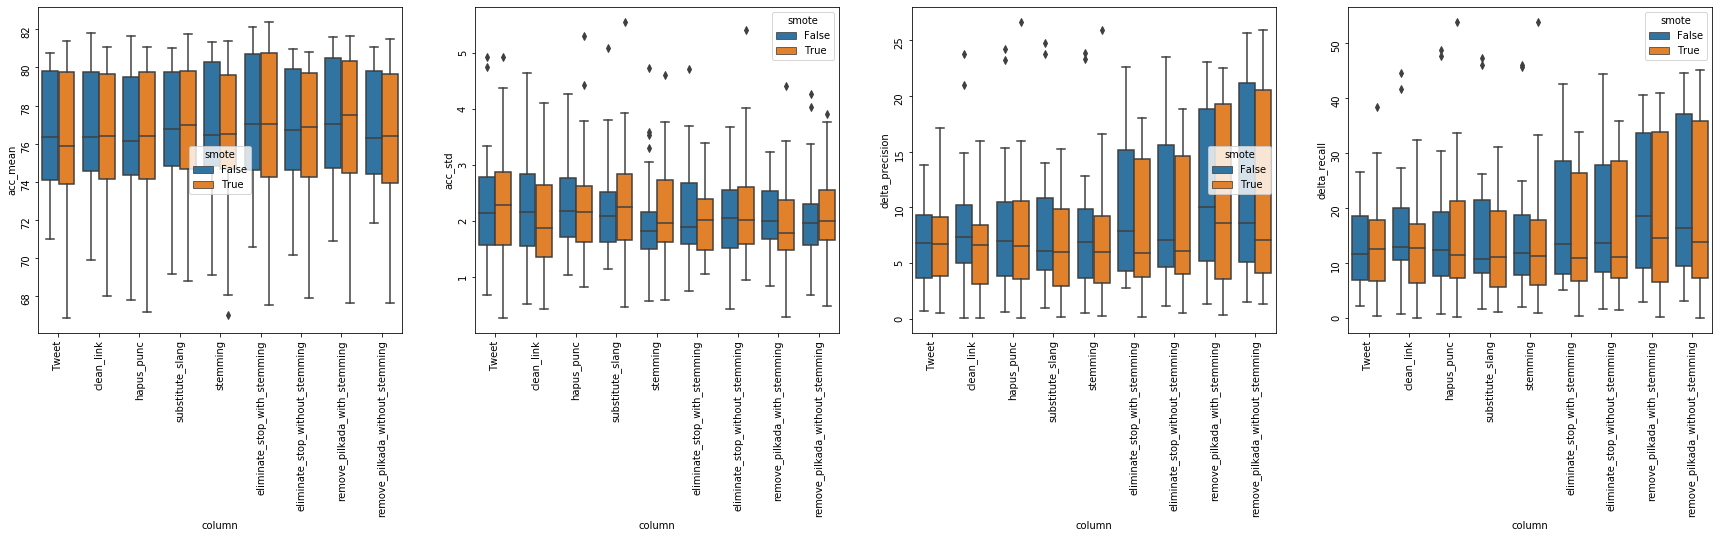

In [27]:
plotvar_boxplot(df, 'column', hue = 'smote')

From graph above, can be seen that LinearSVC model is the best because the data distribution is low and have lowest accuracy std.

## Data visualize LinearSVC model

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2240f0b8>,
      dtype=object)

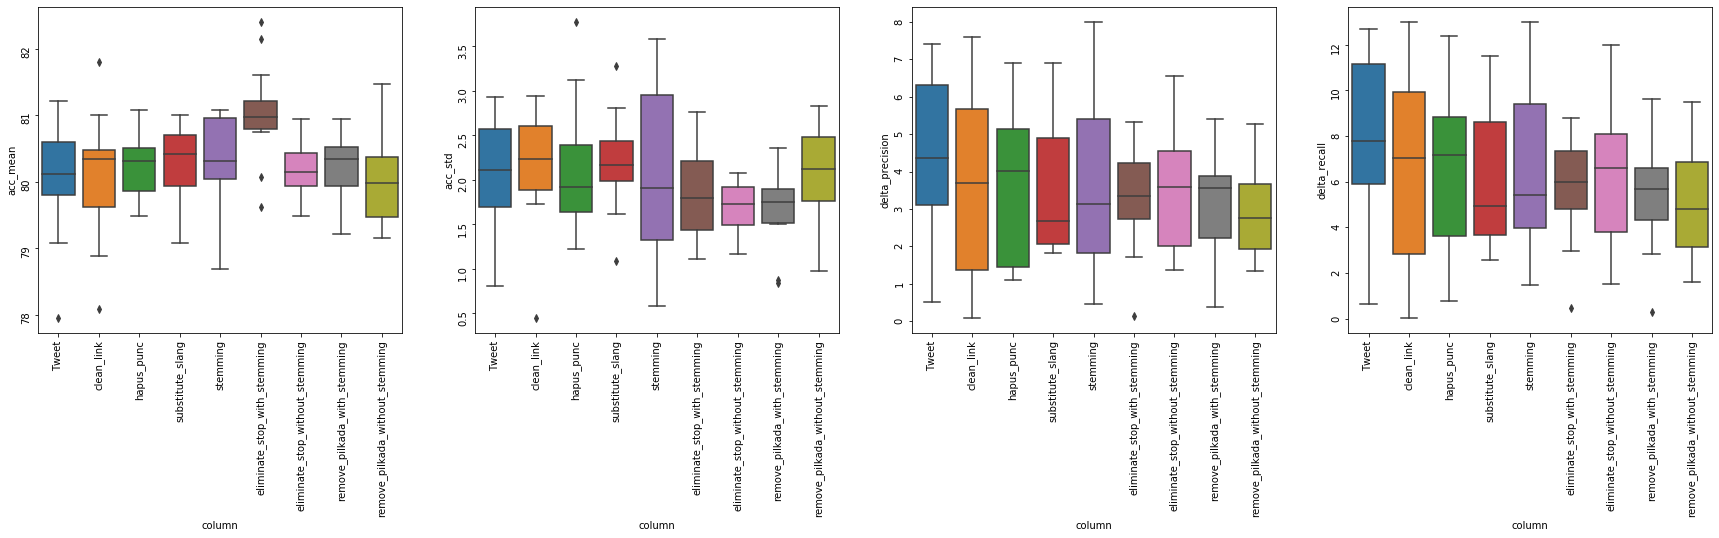

In [31]:
plotvar_boxplot(df[df['classifier'] == 'svm'], 'column')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22ba7780>,
      dtype=object)

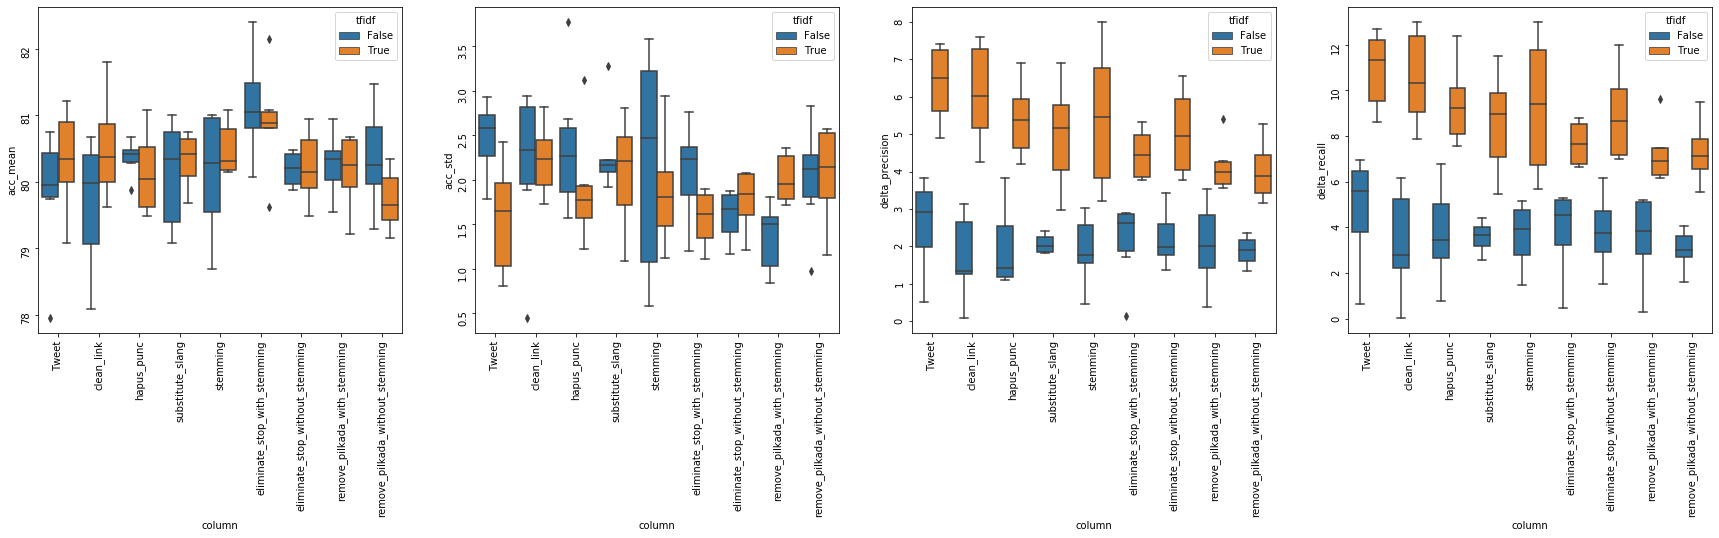

In [32]:
plotvar_boxplot(df[df['classifier'] == 'svm'], 'column', hue = 'tfidf')

not using tfidf give better precision and recall value, because the difference between positive and negative recall and precision value is small.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22b9a6d8>,
      dtype=object)

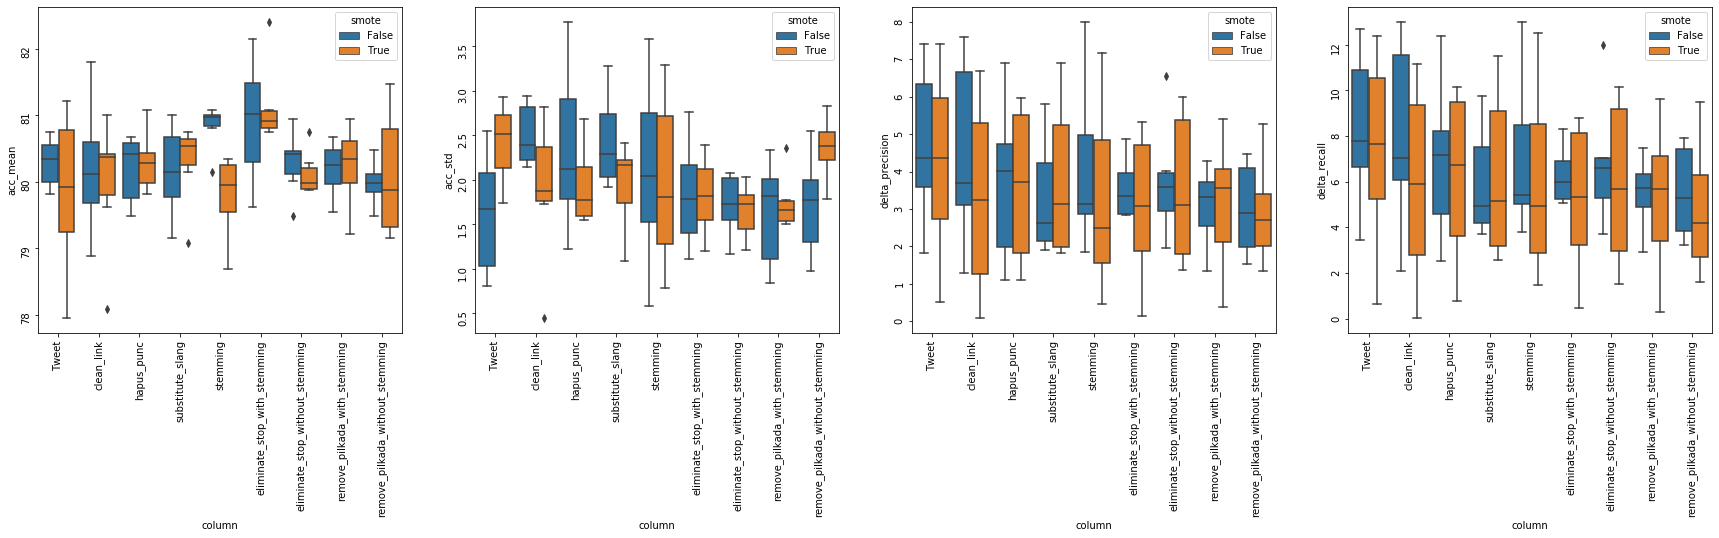

In [33]:
plotvar_boxplot(df[df['classifier'] == 'svm'], 'column', hue = 'smote')

for smote, there is no clear difference between with smote and without smote

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a261211d0>,
      dtype=object)

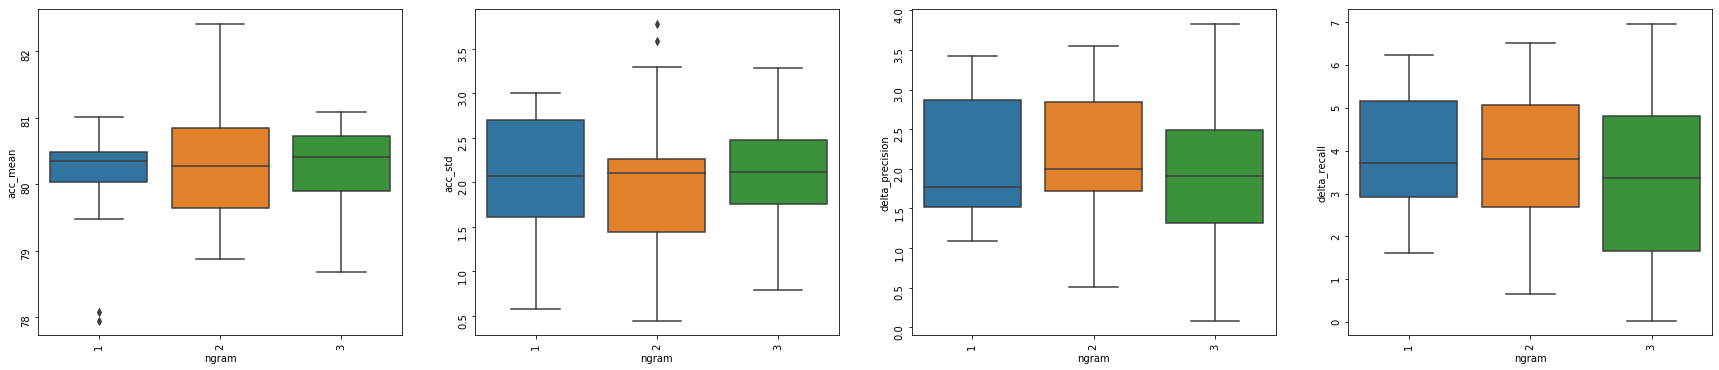

In [37]:
plotvar_boxplot(df[(df['classifier'] == 'svm') & (df['tfidf'] == False)], 'ngram')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26748668>,
      dtype=object)

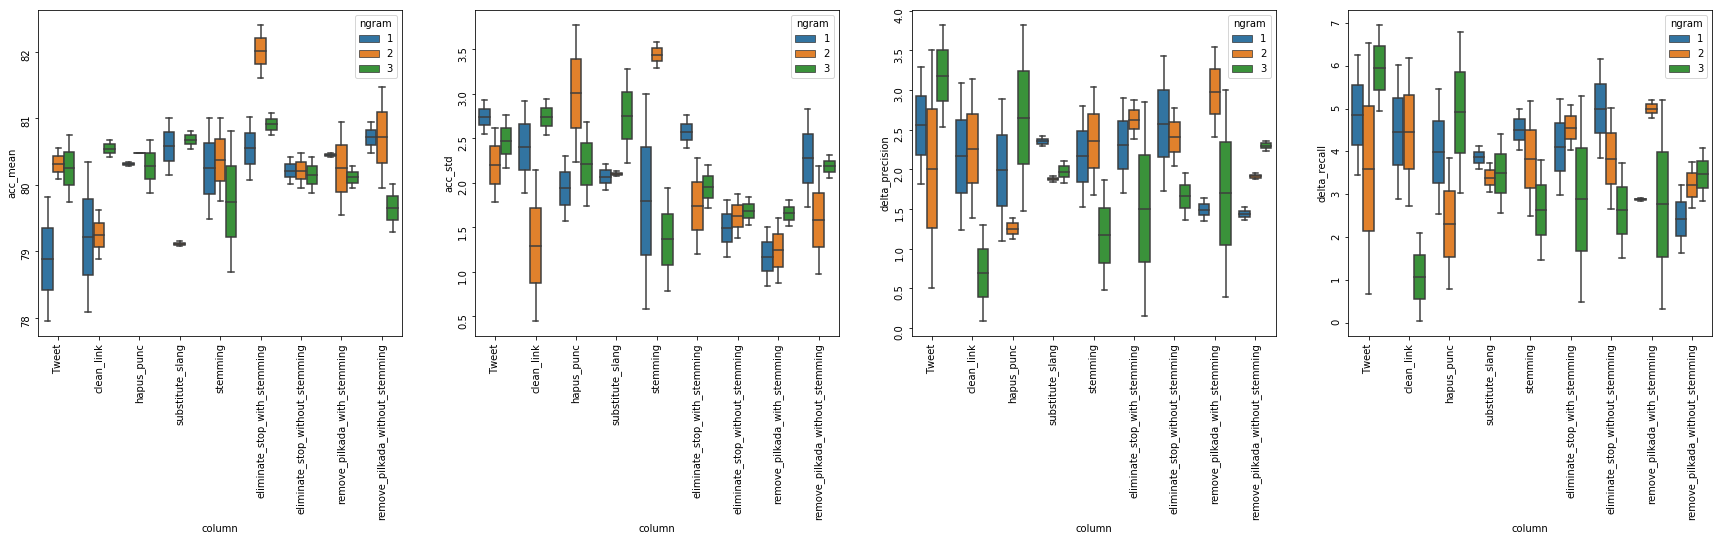

In [38]:
plotvar_boxplot(df[(df['classifier'] == 'svm') & (df['tfidf'] == False)], 'column', hue = 'ngram')

from graph above, it seems eliminate stop with stemming column is the best.

In [40]:
df[(df['classifier'] == 'svm') & (df['tfidf'] == False) & (df['ngram'] == 2)].sort_values('acc_mean', ascending = False)

,acc_mean,acc_std,precision_negative_mean,precision_negative_std,precision_positive_mean,precision_positive_std,recall_negative_mean,recall_negative_std,recall_positive_mean,recall_positive_std,ngram,classifier,time,smote,tfidf,column,delta_precision,delta_recall
510,82.404128,1.200601,83.695627,1.769807,81.314975,1.214890,80.291453,2.713322,84.313498,3.189346,2,svm,0,True,False,eliminate_stop_with_stemming,2.380651,4.022044
511,81.608545,2.273085,83.239708,3.309068,80.370682,3.837301,79.140044,4.307756,84.220390,3.212899,2,svm,0,False,False,eliminate_stop_with_stemming,2.869026,5.080346
798,81.474115,2.187416,80.721296,2.463789,82.668435,3.303533,82.663216,5.077935,79.998987,5.122705,2,svm,0,True,False,remove_pilkada_without_stemming,1.947139,2.664229
415,81.007899,3.587169,82.619587,3.906584,79.579224,3.749094,78.406048,3.436654,83.573395,4.029395,2,svm,0,False,False,stemming,3.040363,5.167348
702,80.941013,1.599846,82.978485,3.367277,79.432686,0.904979,77.983955,3.772099,83.182263,6.449848,2,svm,0,True,False,remove_pilkada_with_stemming,3.545799,5.198308
31,80.545423,1.779187,82.420005,2.904478,78.908715,2.531707,77.291434,3.190298,83.820278,1.748114,2,svm,1,False,False,Tweet,3.511289,6.528844
607,80.478977,1.873957,81.959605,2.897385,79.184202,1.752176,77.981999,1.634297,82.984684,2.884544,2,svm,0,False,False,eliminate_stop_without_stemming,2.775403,5.002685
223,80.476997,3.777869,81.287612,4.520970,79.904072,5.561271,78.625077,6.839441,82.462863,2.468569,2,svm,0,False,False,hapus_punc,1.383540,3.837786
222,80.475677,2.234838,79.983198,1.684096,81.098142,3.615134,80.707665,5.258807,79.935771,2.706134,2,svm,1,True,False,hapus_punc,1.114943,0.771894
30,80.079426,2.617726,79.959299,1.867512,80.467754,3.743100,79.535854,7.052854,80.195298,3.042113,2,svm,1,True,False,Tweet,0.508455,0.659444


### We can conclude that the model best used are svm, without tfidf, with 2 ngram, with smote and with eliminate stop and stemming column